In [5]:
import numpy as np
import yaml
import json
import matplotlib.pyplot as plt
import numpy.typing as npt

from pymatgen.core import Structure
from matplotlib import gridspec
from caesar.logger.logger import setup_logger
from pathlib import Path
from typing import List, Dict, Any, Tuple
from matplotlib import rcParams

config = {
    "font.family":'serif',
    # "font.size": 20,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)


logger = setup_logger(__name__)

In [3]:
file_path='./data/POSCAR_sorted'

In [9]:
s=Structure.from_file(file_path)

In [13]:
s.

array([[ 5.85735   ,  1.95245   , 76.491675  ],
       [ 1.95245   ,  5.85735   , 76.491675  ],
       [ 1.95245   ,  1.95245   , 76.491675  ],
       ...,
       [ 5.85735   ,  7.64610659,  0.        ],
       [ 1.95245   ,  0.16369341,  0.        ],
       [ 5.85735   ,  4.06859341,  0.        ]])

In [1]:
import numpy as np

# 定义向量集合
a = np.array([[1, 0], [1, 0], [1, 0], [1, 0], [1, 0]])  # 两个向量
b = np.array([[-0.242015, 47.2914],
              [-0.232493, 23.3912],
              [-0.231608, 15.4974],
              [-0.227308, 43.3511],
              [-0.196237, 3.6733]])  # 两个向量

# 计算每一对向量与x轴的夹角
theta_a = np.arctan2(a[:, 1], a[:, 0])  # 向量a与x轴的夹角
theta_b = np.arctan2(b[:, 1], b[:, 0])  # 向量b与x轴的夹角

# 计算每一对向量的夹角
theta = np.abs(theta_a - theta_b)

# 如果需要角度制，可以将弧度转换为角度
theta_deg = np.degrees(theta)

print(f'夹角（弧度）：{theta}')
print(f'夹角（度数）：{theta_deg}')

夹角（弧度）：[1.57591381 1.58073534 1.58574017 1.5760397  1.62416813]
夹角（度数）：[90.29321012 90.56946326 90.85621931 90.30042305 93.05797891]


In [9]:
from matplotlib.colors import LinearSegmentedColormap

colors = [
            '#FEAA95',      # 0° (100)
            '#FCFCD5',    # 90° (001)
            '#75BAFB',     # 180° (-100)
            '#BAF5A3',   # 270° (00-1)
            '#FEAA95'       # 360° (回到起点)
        ]

        # colors = ['white', 'white', 'white', 'white', 'white']
        # 创建循环颜色映射
cyclic_cmap = LinearSegmentedColormap.from_list(
            'cyclic', colors, N=256)

[[ -0.242015  47.2914  ]
 [ -0.232493  23.3912  ]
 [ -0.231608  15.4974  ]
 [ -0.227308  43.3511  ]
 [ -0.196237   3.6733  ]
 [ -0.156806  23.8206  ]
 [ -0.1507    16.0074  ]
 [ -0.138889  23.8128  ]
 [  3.523     39.246   ]
 [  3.59106  -32.07334 ]]
{'x': 800, 'z': 800, 'angle': 800}


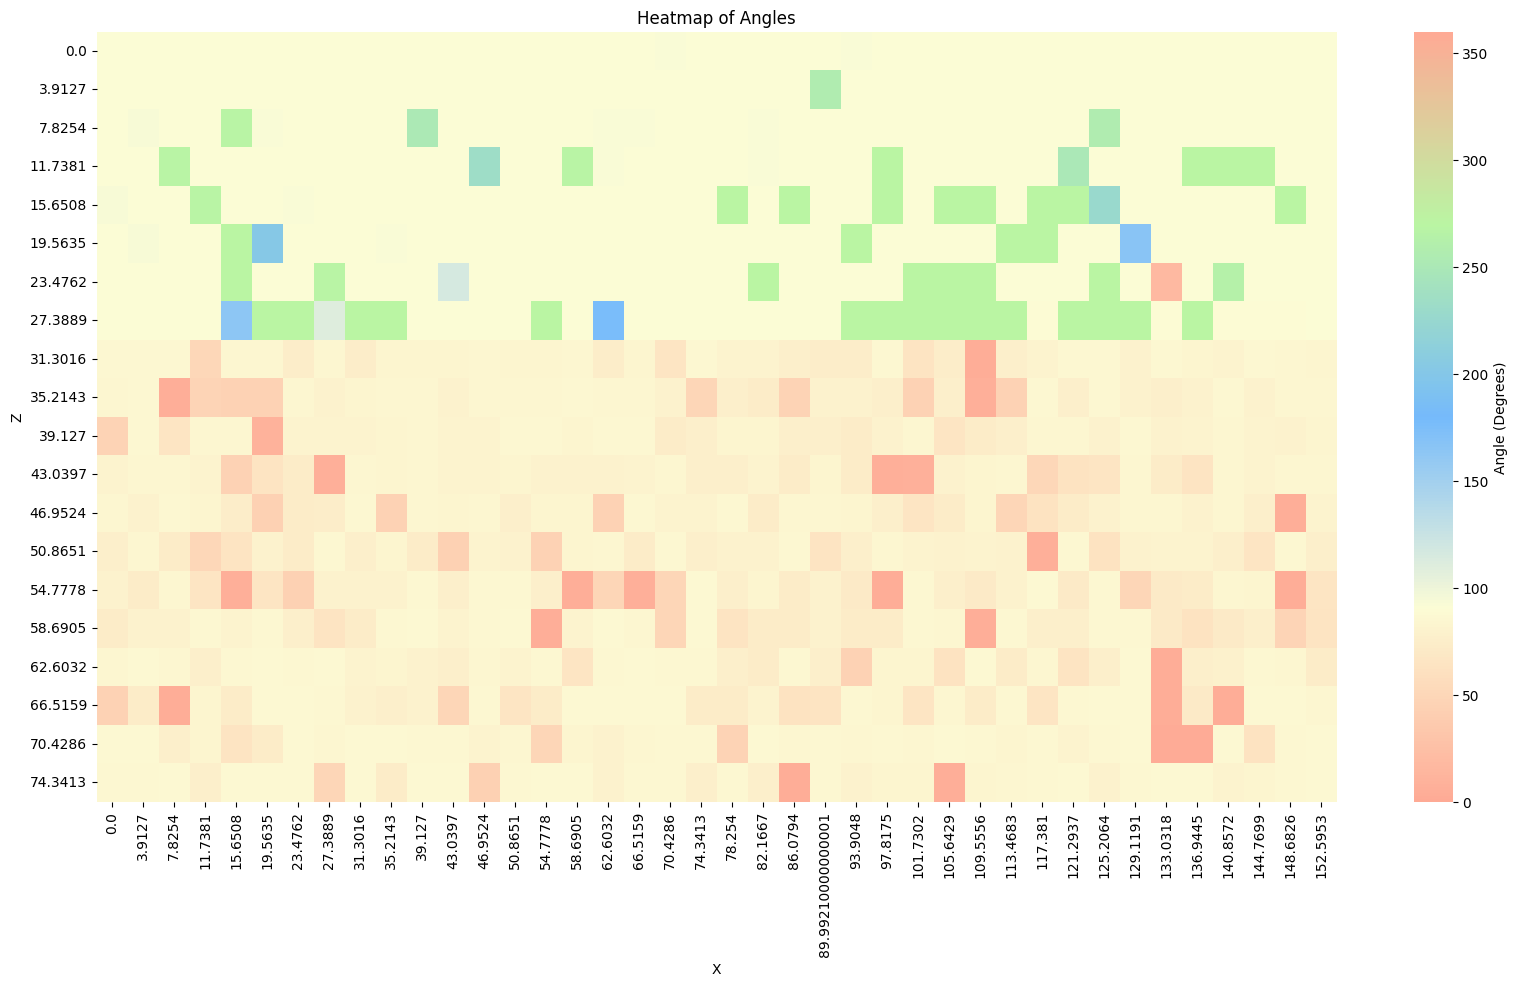

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 定义数据
data=pd.read_csv('D:/work/code/plot_script/psto/plot_polarization/data/angle_data.csv')
offset_vectors=np.load('D:/work/code/plot_script/psto/plot_polarization/data/offset_vectors.npy')

offset_vectors=offset_vectors[:,[0,2]]
print(offset_vectors[:10])

# 检查长度
lengths = {k: len(v) for k, v in data.items()}
print(lengths)

# 如果长度一致，则创建DataFrame
df = pd.DataFrame(data)

# 创建透视表用于绘制热力图
heatmap_data = df.pivot(index='z', columns='x', values='angle')

# 使用seaborn绘制热力图
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap=cyclic_cmap, annot=False, fmt='.2f', cbar_kws={'label': 'Angle (Degrees)'},vmin=0,vmax=360)

plt.title("Heatmap of Angles")
plt.xlabel('X')
plt.ylabel('Z')
plt.show()


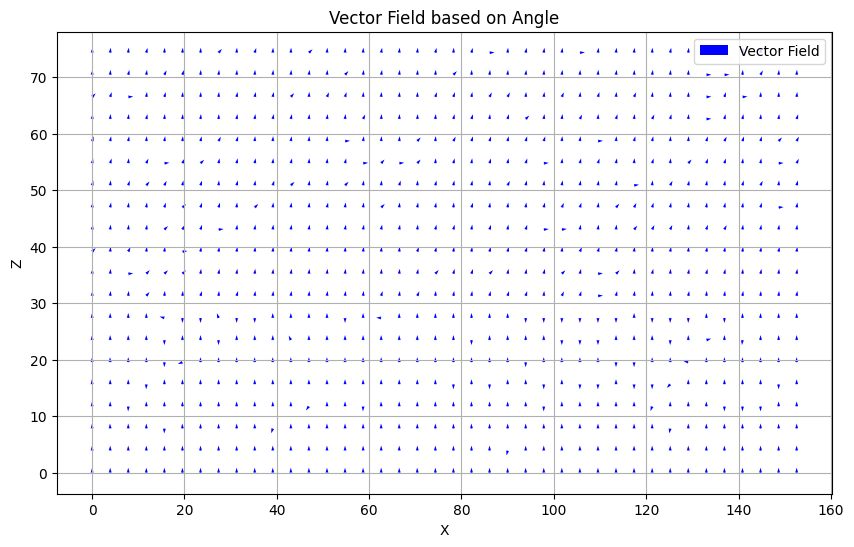

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 讀取數據
data = pd.read_csv('D:/work/code/plot_script/psto/plot_polarization/data/angle_data.csv')
x = data["x"].values
z = data["z"].values
angles = data["angle"].values

# 計算向量分量
theta = np.deg2rad(angles)
magnitude = 1
u = magnitude * np.cos(theta)
v = magnitude * np.sin(theta)

# 繪圖
plt.figure(figsize=(10, 6))
quiver = plt.quiver(
    x, z, u, v,
    angles=angles,
    scale=20,
    scale_units="inches",
    color="blue",
    label="Vector Field"
)

plt.xlabel("X")
plt.ylabel("Z")
plt.title("Vector Field based on Angle")
plt.grid(True)
plt.legend()
plt.show()
